In [17]:
# Librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

In [3]:
# Carga de datos 
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [19]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


## Revisión de los datos
Una vez se han cargado los datos con los cuales vamos a entrenar nuestro modelo, una buen a práctica es revisar los datos con los que estaremos trabajando

In [93]:
# columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
columns = [col for col in data.columns ]
columns.remove('No')
columns.remove('Y house price of unit area')
section = widgets.RadioButtons(
    options=columns,
    value='X2 house age',
    description='Parameter to explore:',
    disabled=False,
)
display(section)

RadioButtons(description='Parameter to explore:', index=1, options=('X1 transaction date', 'X2 house age', 'X3…

In [94]:
ones = np.ones((len(data),1))
x = data[section.value]
y = data['Y house price of unit area']
A = np.column_stack((x,ones))
# A = np.column_stack((x,ones))

theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)),np.transpose(A)),y)
print(theta)

[-0.25148842 42.43469705]


In [95]:
theta = np.linalg.pinv(A.T@A)@A.T@y
print(theta)

[-0.25148842 42.43469705]


In [96]:
h = np.matmul(A,theta)

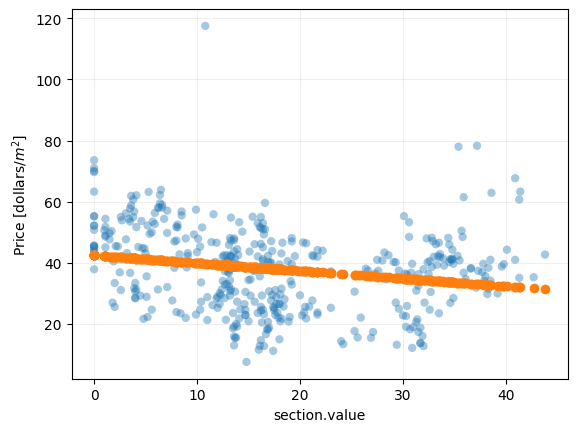

In [97]:
# Graficando las variables de interes
plt.scatter(data[section.value], data['Y house price of unit area'],alpha=0.4,edgecolor='none')
plt.xlabel('section.value')
plt.ylabel('Price [dollars/$m^2$]')
plt.scatter(x,h)
plt.grid(visible=True,alpha=0.2)

In [99]:
# Matriz 
ones = np.ones((len(data),1))
x = data['X2 house age']
y = data['Y house price of unit area']
A = np.column_stack((x,x**2,ones))
#print(A)
print(columns)

['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


In [68]:

checkbox_layout = widgets.Layout(
    display='flex',
    flex='70%',
    flex_flox='row wrap',
    align_items= 'center',
    align_content='stretch',
    width="100%"
)
params = [widgets.Checkbox(description=col, layout=widgets.Layout(width='500px')) for col in columns]
display(widgets.HBox(children=params, layout=checkbox_layout))

In [16]:
# @params Theta: observaciones, A:Matrix que define el modelo
def h_theta(theta,A):
    return A@theta

In [15]:
# representa la forma J = (1/m) eT * e
def cost_j(theta, h, y):
    e = h - y
    m = len(y)
    J = (1/m * e.T@e)
    return J


In [18]:
alpha = widgets.FloatSlider(
    value=5,
    min=0,
    max=100.0,
    step=0.1,
    description='Valor de alpha',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(alpha)

FloatSlider(value=5.0, continuous_update=False, description='Valor de alpha', readout_format='.1f')

In [14]:
def derivate_J(theta,h,A,y):
    e = h - y
    m = len(y)
    dxJ = 1/m * A.T@e
    return dxJ

Para realizar la actualización de datos, se usará la función _update_data_, la cual hace el cálculo de: 
$$ \begin{equation}
   \theta_{j+1} = \theta_{j} - \frac{\alpha}{m} A^Te
   \end{equation}$$
Con los siguientes párametros esperados: 
* $ \theta_j $
* La tasa de aprendizaje $ \alpha $
* La matriz A
* la salida del modelo $ h_\theta $
* La salida esperada y

Y retorna el parámetro actualizado $\theta_{j+1}$


In [13]:
def update_data(theta_j, alpha, A, h, y):
    e =  h - y
    m = len(y)
    res = theta_j - (alpha/m * A.T@e)
    return res